In [80]:
# Load libraries
library(dplyr)
library(ggplot2)
library(patchwork)
library(corrplot)
library(knitr)


In [81]:
# Load data
data <- read.csv('USvotes.csv')



In [82]:
# Basic inspection
head(data)
summary(data)

,STNAME,CTYNAME,TOT_POP,TOT_MALE,TOT_FEMALE,total_votes,per_gop,Crude.Prevalence.Estimate,race
,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,Alabama,Autauga County,60342,29277,31065,28190,72.66407,24.5,74.46057
2,Alabama,Baldwin County,253507,123497,130010,121808,78.64672,24.6,87.37313
3,Alabama,Barbour County,24585,13066,11519,9832,57.01790,23.7,49.62782
4,Alabama,Bibb County,21868,11530,10338,9241,81.93918,24.8,76.67825
5,Alabama,Blount County,59816,29756,30060,28115,90.17962,26.7,95.25545
6,Alabama,Bullock County,9897,5460,4437,4106,26.81442,22.0,26.19986


    STNAME            CTYNAME             TOT_POP           TOT_MALE      
 Length:3107        Length:3107        Min.   :     43   Min.   :     31  
 Class :character   Class :character   1st Qu.:  10922   1st Qu.:   5510  
 Mode  :character   Mode  :character   Median :  26125   Median :  13205  
                                       Mean   : 106488   Mean   :  52701  
                                       3rd Qu.:  69335   3rd Qu.:  34932  
                                       Max.   :9663345   Max.   :4780566  
   TOT_FEMALE       total_votes         per_gop       Crude.Prevalence.Estimate
 Min.   :     12   Min.   :     97   Min.   : 5.081   Min.   :10.70            
 1st Qu.:   5374   1st Qu.:   5250   1st Qu.:58.260   1st Qu.:18.80            
 Median :  12980   Median :  12549   Median :70.274   Median :21.10            
 Mean   :  53787   Mean   :  49089   Mean   :66.947   Mean   :21.13            
 3rd Qu.:  34538   3rd Qu.:  33866   3rd Qu.:79.177   3rd Qu.:23.30        

In [83]:
# 1. Core Distributions ---------------------------------------------------
# Custom theme for consistency
my_theme <- theme_minimal() +
  theme(plot.title = element_text(size = 11, face = "bold"),
        axis.title = element_text(size = 9))



In [84]:
# Voting distribution
p_gop <- ggplot(data, aes(x = per_gop)) + 
  geom_histogram(fill = "red3", bins = 30, alpha = 0.8) +
  labs(title = "Distribution of Republican Vote %", 
       x = "Percentage GOP Votes", y = "County Count") +
  my_theme



In [85]:
# Depression distribution
p_dep <- ggplot(data, aes(x = Crude.Prevalence.Estimate)) + 
  geom_histogram(fill = "blue3", bins = 30, alpha = 0.8) +
  labs(title = "Distribution of Depression Rates", 
       x = "Depression Prevalence %", y = "") +
  my_theme



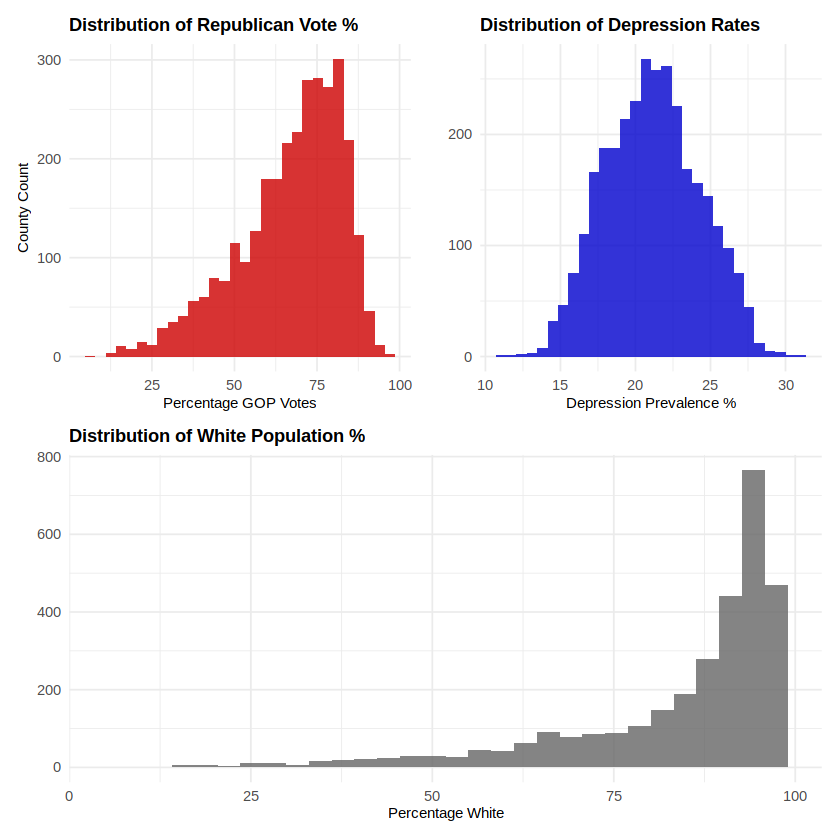

In [86]:
# Race distribution
p_race <- ggplot(data, aes(x = race)) + 
  geom_histogram(fill = "gray40", bins = 30, alpha = 0.8) +
  labs(title = "Distribution of White Population %", 
       x = "Percentage White", y = "") +
  my_theme

(p_gop + p_dep) / p_race

`geom_smooth()` using formula = 'y ~ x'


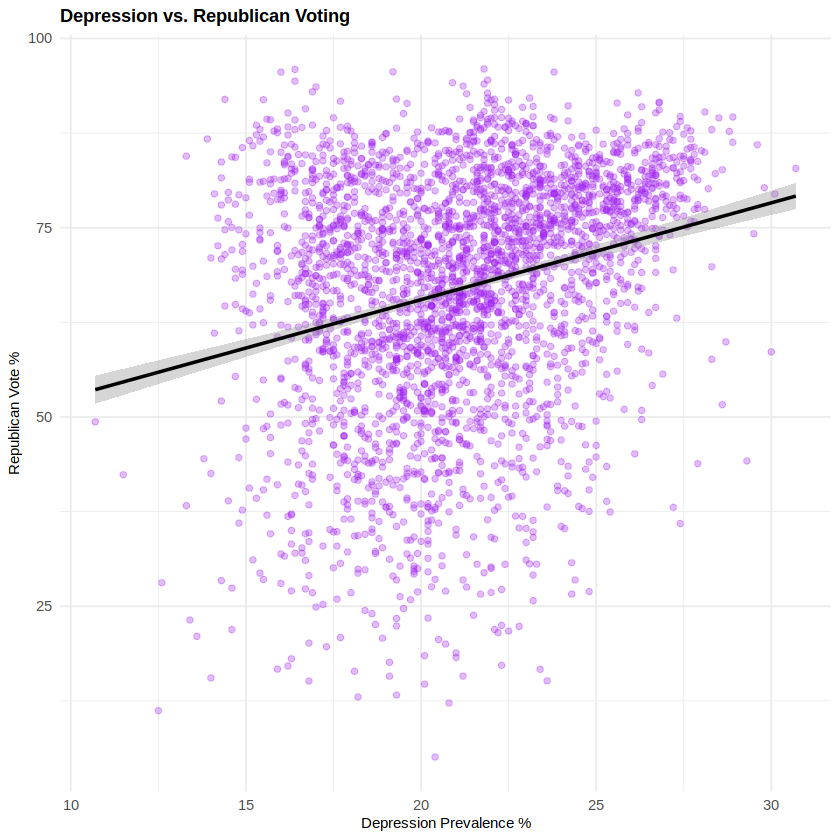

In [87]:


# 2. Key Relationships ---------------------------------------------------
# Depression vs. GOP voting
ggplot(data, aes(x = Crude.Prevalence.Estimate, y = per_gop)) +
  geom_point(alpha = 0.3, color = "purple") + 
  geom_smooth(method = "lm", color = "black", se = TRUE) +  # Added confidence interval
  labs(x = "Depression Prevalence %", 
       y = "Republican Vote %",
       title = "Depression vs. Republican Voting") +
  my_theme


`geom_smooth()` using formula = 'y ~ x'


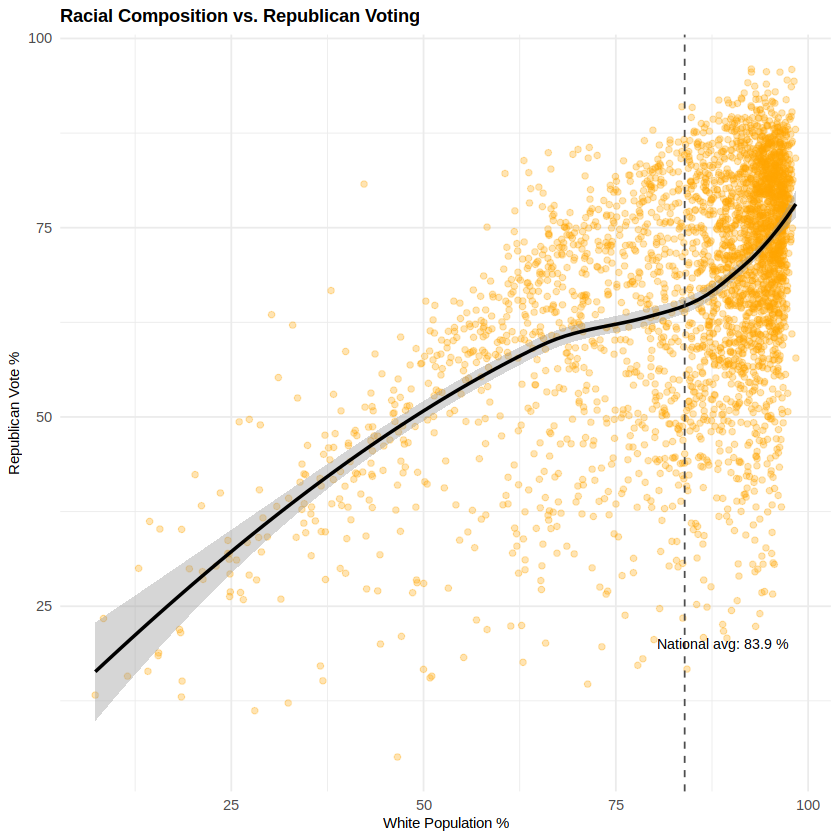

In [88]:
# Race vs. GOP voting (with reference line at national white %)
national_white <- mean(data$race, na.rm = TRUE)
ggplot(data, aes(x = race, y = per_gop)) +
  geom_point(alpha = 0.3, color = "orange") + 
  geom_smooth(method = "loess", color = "black") +
  geom_vline(xintercept = national_white, linetype = "dashed", color = "gray30") +
  annotate("text", x = national_white + 5, y = 20, 
           label = paste("National avg:", round(national_white, 1), "%"), 
           size = 3) +
  labs(x = "White Population %", 
       y = "Republican Vote %",
       title = "Racial Composition vs. Republican Voting") +
  my_theme


In [89]:
# 3. State-Level Analysis ------------------------------------------------
# Top/bottom states
state_avg <- data %>%
  group_by(STNAME) %>%
  summarize(mean_gop = mean(per_gop),
            mean_depression = mean(Crude.Prevalence.Estimate),
            n_counties = n()) %>%
  arrange(desc(mean_gop))




Table: Top 5 Most Republican States

|STNAME    | mean_gop| mean_depression| n_counties|
|:---------|--------:|---------------:|----------:|
|Nebraska  | 79.54467|        16.33871|         93|
|Oklahoma  | 78.53479|        24.20000|         77|
|Tennessee | 77.40754|        26.27263|         95|
|Texas     | 77.10911|        21.35984|        254|
|Wyoming   | 76.96751|        17.39565|         23|



Table: Top 5 Most Democratic States

|STNAME               |  mean_gop| mean_depression| n_counties|
|:--------------------|---------:|---------------:|----------:|
|Rhode Island         | 40.595999|        21.58000|          5|
|Vermont              | 37.185499|        23.57143|         14|
|Hawaii               | 37.053154|        15.05000|          4|
|Massachusetts        | 34.617925|        18.87143|         14|
|District of Columbia |  5.081185|        20.40000|          1|

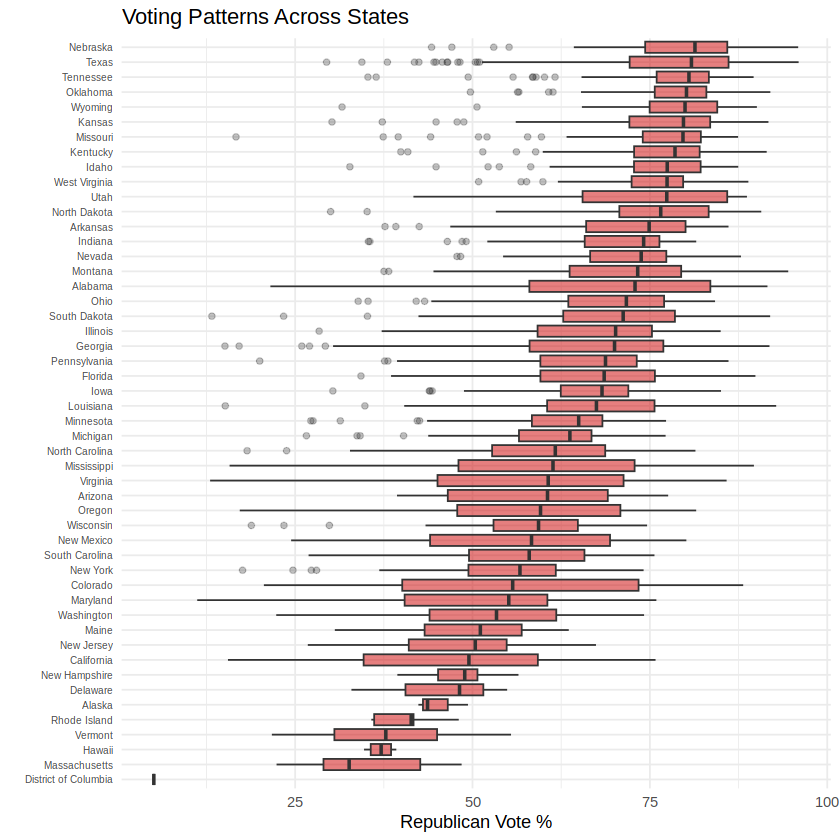

In [90]:
# Print tables
knitr::kable(head(state_avg, 5), 
             caption = "Top 5 Most Republican States")
knitr::kable(tail(state_avg, 5), 
             caption = "Top 5 Most Democratic States")

# State variability plot
ggplot(data, aes(x = reorder(STNAME, per_gop, median), y = per_gop)) +
  geom_boxplot(fill = "red3", alpha = 0.5, outlier.alpha = 0.3) +
  coord_flip() +
  labs(x = "", y = "Republican Vote %",
       title = "Voting Patterns Across States") +
  theme_minimal() +
  theme(axis.text.y = element_text(size = 6))


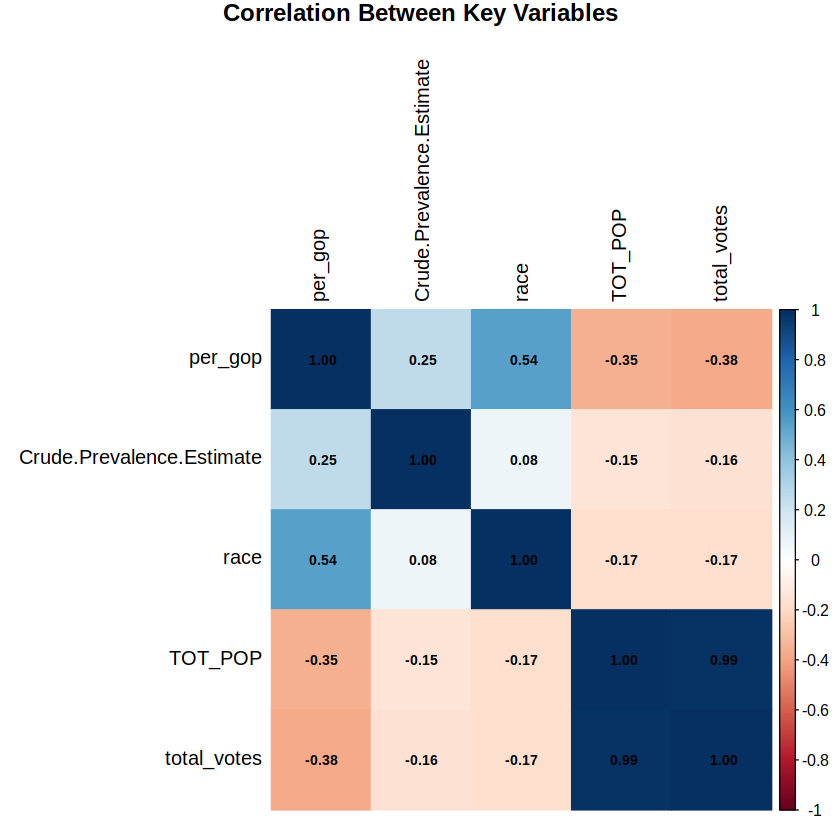

In [91]:
# 4. Correlation Analysis -----------------------------------------------
cor_vars <- data %>% 
  select(per_gop, Crude.Prevalence.Estimate, race, TOT_POP, total_votes)
cor_matrix <- cor(cor_vars, use = "complete.obs")

corrplot(cor_matrix, method = "color", 
         tl.col = "black", 
         addCoef.col = "black",
         number.cex = 0.7,
         title = "Correlation Between Key Variables",
         mar = c(0,0,1,0))


`geom_smooth()` using formula = 'y ~ x'


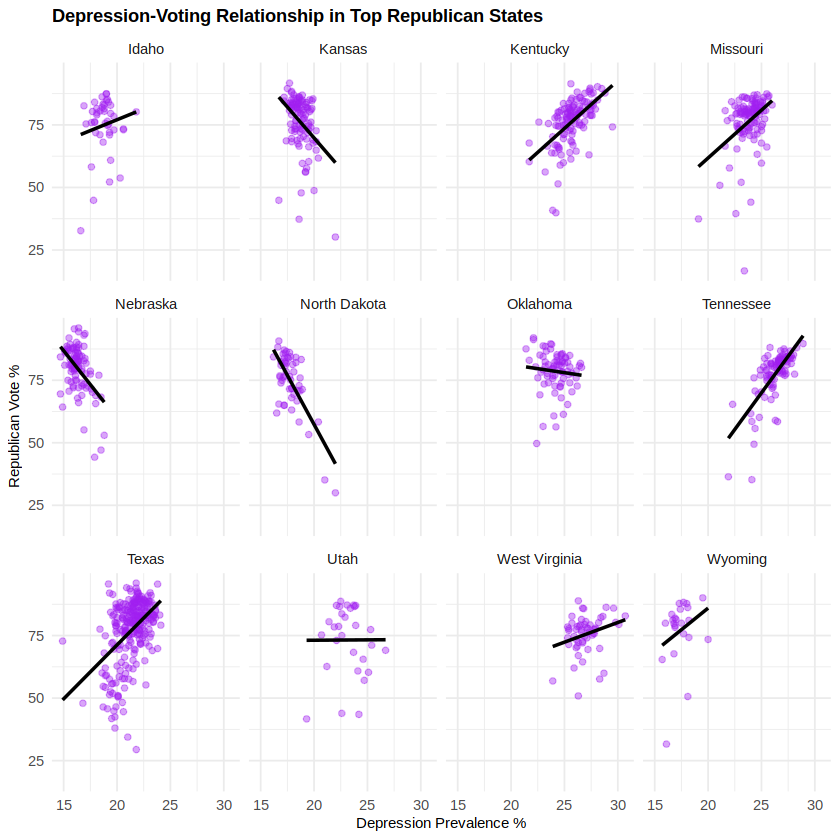

In [92]:
# 5. Advanced Visualizations -------------------------------------------
# Faceted by state (top 12 states for readability)
top_states <- state_avg$STNAME[1:12]
facet_data <- data %>% filter(STNAME %in% top_states)

ggplot(facet_data, aes(x = Crude.Prevalence.Estimate, y = per_gop)) +
  geom_point(alpha = 0.4, color = "purple") +
  geom_smooth(method = "lm", color = "black", se = FALSE) +
  facet_wrap(~ STNAME, ncol = 4) +
  labs(x = "Depression Prevalence %", 
       y = "Republican Vote %",
       title = "Depression-Voting Relationship in Top Republican States") +
  my_theme

`geom_smooth()` using formula = 'y ~ x'


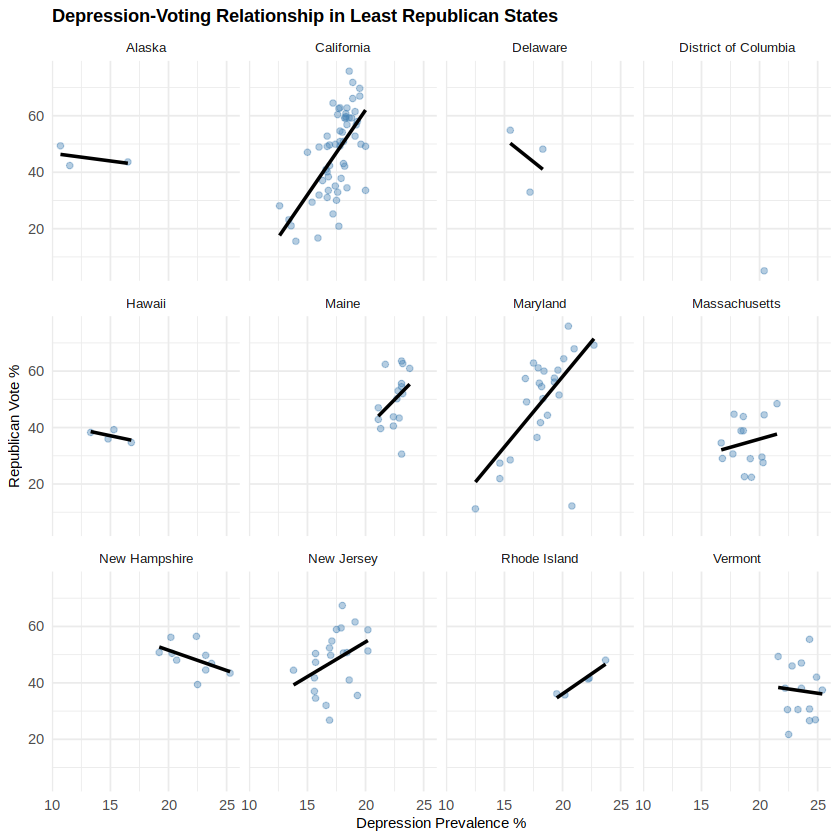

In [93]:
# 5. Advanced Visualizations (Last 12 States) -------------------------------------------
# Get last 12 states from the sorted state_avg dataframe
last_12_states <- tail(state_avg$STNAME, 12)  
facet_data_last12 <- data %>% 
  filter(STNAME %in% last_12_states)

# Plot with same styling as original
ggplot(facet_data_last12, aes(x = Crude.Prevalence.Estimate, y = per_gop)) +
  geom_point(alpha = 0.4, color = "steelblue") +  # Changed color for contrast
  geom_smooth(method = "lm", color = "black", se = FALSE) +
  facet_wrap(~ STNAME, ncol = 4) +
  labs(x = "Depression Prevalence %", 
       y = "Republican Vote %",
       title = "Depression-Voting Relationship in Least Republican States") +
  my_theme +
  theme(strip.text = element_text(size = 8))  # Smaller state labels if needed